# Titanic - Machine Learning from Disaster
### XGBoost Classifier

### Table of Contents
- [Titanic - Machine Learning from Disaster](#titanic-machine-learning-from-disaster)
- [Extracting Data](#extracting-data)
- [Data Cleaning](#data-cleaning)

In [189]:
%conda install pandas numpy matplotlib seaborn xgboost scikit-learn

Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [190]:
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from xgboost import XGBClassifier

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

sys.path.insert(0, '../helpers')

from calculate_average import calculate_average

sys.path.insert(0, './helpers')

from one_hot_encode_passenger_sex import one_hot_encode_passenger_sex
from one_hot_encode_adult_or_child import one_hot_encode_adult_or_child
from one_hot_encode_passenger_class import one_hot_encode_passenger_class
from one_hot_encode_embarked import one_hot_encode_embarked

In [191]:
dataset = "titanic"
dataset_directory = f"../../datasets/{dataset}"
training_dataset_directory = f"{dataset_directory}/train.csv"
test_dataset_directory = f"{dataset_directory}/test.csv"

# Extracting Data

In [192]:
titanic_train_dataframes = pd.read_csv(training_dataset_directory)
titanic_train_dataframes.head(n=25)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


## Data Cleaning

In [193]:
ages = titanic_train_dataframes["Age"].values.reshape(-1, 1)
average_age = calculate_average(ages)
titanic_train_dataframes["Age"].fillna(value=average_age, inplace=True)
ages = titanic_train_dataframes["Age"]

fares = titanic_train_dataframes["Fare"].values.reshape(-1, 1)
average_fare = calculate_average(fares)

titanic_train_dataframes['Embarked'].replace('nan',np.nan,inplace=True)
titanic_train_dataframes['Embarked'].fillna(titanic_train_dataframes['Embarked'].mode()[0],inplace=True)

ss_scaler = StandardScaler()
ss_scaler.fit_transform(titanic_train_dataframes[['Age']])
titanic_train_dataframes.head(n=25)

array([[-4.94244983e-01],
       [ 7.17307074e-01],
       [-1.91356969e-01],
       [ 4.90141064e-01],
       [ 4.90141064e-01],
       [-3.57998918e-01],
       [ 1.92885913e+00],
       [-2.00868506e+00],
       [-1.15634965e-01],
       [-1.10002101e+00],
       [-1.85724105e+00],
       [ 2.23174715e+00],
       [-6.45688991e-01],
       [ 7.93029078e-01],
       [-1.10002101e+00],
       [ 2.00458114e+00],
       [-2.00868506e+00],
       [-3.57998918e-01],
       [ 1.87253049e-01],
       [-3.57998918e-01],
       [ 4.90141064e-01],
       [ 4.14419060e-01],
       [-1.02429901e+00],
       [-3.99129617e-02],
       [-1.55435303e+00],
       [ 7.17307074e-01],
       [-3.57998918e-01],
       [-7.21410994e-01],
       [-3.57998918e-01],
       [-3.57998918e-01],
       [ 8.68751082e-01],
       [-3.57998918e-01],
       [-3.57998918e-01],
       [ 2.83752318e+00],
       [-3.99129617e-02],
       [ 1.02019509e+00],
       [-3.57998918e-01],
       [-5.69966987e-01],
       [-7.9

In [194]:
one_hot_encoder = OneHotEncoder(handle_unknown='ignore')

titanic_train_dataframes = one_hot_encode_passenger_sex(one_hot_encoder=one_hot_encoder, titanic_dataframes=titanic_train_dataframes)
titanic_train_dataframes = one_hot_encode_adult_or_child(titanic_dataframes=titanic_train_dataframes, ages=ages)
titanic_train_dataframes = one_hot_encode_passenger_class(one_hot_encoder=one_hot_encoder, titanic_dataframes=titanic_train_dataframes)
titanic_train_dataframes = one_hot_encode_embarked(one_hot_encoder=one_hot_encoder, titanic_dataframes=titanic_train_dataframes)

In [195]:
titanic_train_dataframes.drop(['Sex'] ,axis=1, inplace=True)
titanic_train_dataframes.drop(['PassengerId'] ,axis=1, inplace=True)
titanic_train_dataframes.drop(['Name'] ,axis=1, inplace=True)
titanic_train_dataframes.drop(['Embarked'] ,axis=1, inplace=True)
titanic_train_dataframes.drop(['Ticket'] ,axis=1, inplace=True)
titanic_train_dataframes.drop(['Cabin'] ,axis=1, inplace=True)
titanic_train_dataframes.drop(['Pclass'] ,axis=1, inplace=True)
titanic_train_dataframes.drop(['Fare'] ,axis=1, inplace=True)

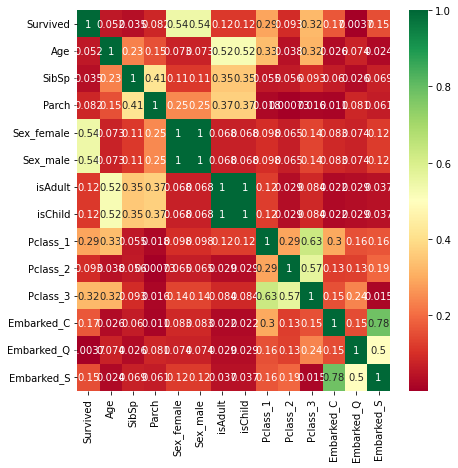

In [196]:
#Plotting correlation heatmap
corr = titanic_train_dataframes.corr()
corr = corr.apply(abs)
plt.figure(figsize=(7,7))
map = sns.heatmap(corr,annot=True,cmap="RdYlGn")

In [197]:
y = titanic_train_dataframes["Survived"]

titanic_train_dataframes.drop(['Survived'] ,axis=1, inplace=True)

X = titanic_train_dataframes

In [198]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.1, random_state=13
)

In [199]:
params = {
'n_estimators': range(5,15),
'max_depth': range(1, 15),
'learning_rate': [.1, .2, .3, .4, .5, .6],
'colsample_bytree': [.7, .8, .9, 1],
'eval_metric': ['error', 'logloss'],
'use_label_encoder': [False]
}

params = {'colsample_bytree': 1, 'eval_metric': 'error', 'learning_rate': 0.6, 'max_depth': 2, 'n_estimators': 6, 'use_label_encoder': False}


xgb_classifier = XGBClassifier()

#Searching for the best parameters
g_search = GridSearchCV(estimator = xgb_classifier, param_grid = params,
cv = 3, n_jobs = 1, verbose = 0, return_train_score=True)
#Fitting the model using best parameters found
g_search.fit(X_train, y_train)
#Printing the best parameters found
print(g_search.best_params_)


{'colsample_bytree': 1, 'eval_metric': 'error', 'learning_rate': 0.6, 'max_depth': 2, 'n_estimators': 6, 'use_label_encoder': False}


In [200]:
#Calculating the model's score
g_search.score(X_test,y_test)

0.8555555555555555

In [201]:
params = g_search.best_params_

In [202]:
titanic_test_dataframes = pd.read_csv(test_dataset_directory)

In [203]:
X_train = X
y_train = y

xgb_classifier = XGBClassifier(**params)
xgb_classifier.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eval_metric='error', gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.6, max_delta_step=0,
              max_depth=2, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=6, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

In [204]:
titanic_test_dataframes["Age"].fillna(value=average_age, inplace=True)
ages = titanic_test_dataframes["Age"]

titanic_test_dataframes["Fare"].fillna(value=average_fare, inplace=True)

titanic_test_dataframes['Embarked'].replace('nan',np.nan,inplace=True)
titanic_test_dataframes['Embarked'].fillna(titanic_test_dataframes['Embarked'].mode()[0],inplace=True)

ss_scaler.fit_transform(titanic_test_dataframes[['Age']])

titanic_test_dataframes = one_hot_encode_passenger_sex(one_hot_encoder=one_hot_encoder, titanic_dataframes=titanic_test_dataframes)
titanic_test_dataframes = one_hot_encode_adult_or_child(titanic_dataframes=titanic_test_dataframes, ages=ages)
titanic_test_dataframes = one_hot_encode_passenger_class(one_hot_encoder=one_hot_encoder, titanic_dataframes=titanic_test_dataframes)
titanic_test_dataframes = one_hot_encode_embarked(one_hot_encoder=one_hot_encoder, titanic_dataframes=titanic_test_dataframes)

passenger_ids = titanic_test_dataframes['PassengerId'].values.reshape(-1, 1)

titanic_test_dataframes.drop(['Sex'] ,axis=1, inplace=True)
titanic_test_dataframes.drop(['PassengerId'] ,axis=1, inplace=True)
titanic_test_dataframes.drop(['Name'] ,axis=1, inplace=True)
titanic_test_dataframes.drop(['Embarked'] ,axis=1, inplace=True)
titanic_test_dataframes.drop(['Ticket'] ,axis=1, inplace=True)
titanic_test_dataframes.drop(['Cabin'] ,axis=1, inplace=True)
titanic_test_dataframes.drop(['Pclass'] ,axis=1, inplace=True)
titanic_test_dataframes.drop(['Fare'] ,axis=1, inplace=True)

titanic_test_dataframes.head(n=25)

,Age,SibSp,Parch,Sex_female,Sex_male,isAdult,isChild,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S
0,34.500000,0,0,0.0,1.0,1,0,0.0,0.0,1.0,0.0,1.0,0.0
1,47.000000,1,0,1.0,0.0,1,0,0.0,0.0,1.0,0.0,0.0,1.0
2,62.000000,0,0,0.0,1.0,1,0,0.0,1.0,0.0,0.0,1.0,0.0
3,27.000000,0,0,0.0,1.0,1,0,0.0,0.0,1.0,0.0,0.0,1.0
4,22.000000,1,1,1.0,0.0,1,0,0.0,0.0,1.0,0.0,0.0,1.0
5,14.000000,0,0,0.0,1.0,1,0,0.0,0.0,1.0,0.0,0.0,1.0
6,30.000000,0,0,1.0,0.0,1,0,0.0,0.0,1.0,0.0,1.0,0.0
7,26.000000,1,1,0.0,1.0,1,0,0.0,1.0,0.0,0.0,0.0,1.0
8,18.000000,0,0,1.0,0.0,1,0,0.0,0.0,1.0,1.0,0.0,0.0
9,21.000000,2,0,0.0,1.0,1,0,0.0,0.0,1.0,0.0,0.0,1.0


In [205]:
predictions = xgb_classifier.predict(titanic_test_dataframes)

passenger_ids = pd.DataFrame(passenger_ids, columns=["PassengerId"])
predictions = pd.DataFrame(predictions, columns=["Survived"])

submission = pd.concat([passenger_ids, predictions ], axis=1)
submission.head(n=10)

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0


In [206]:
submission.to_csv("./result/xgb_boost_classifier_submission.csv", index=False)